In [1]:
import pandas
import numpy
import difflib

import matplotlib
from matplotlib import pyplot

import seaborn

from scipy.stats import mode

from sklearn import metrics

%matplotlib inline
pandas.options.display.max_columns = 50

In [2]:
#read csv
master_catalog_data_frame = pandas.read_csv('Master_Catalog_Sheet1.csv')

  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
master_catalog_data_frame.head()

,MASTER_CATALOG_ID,UPC_ITEM_CODE,UPC_PACK_CODE,UPC_CASE_CODE,MANUFACTURER_NAME,BRAND_NAME,PRODUCT_NAME,PACKS_PER_CASE,UNITS_PER_PACK,UNIT_OF_MEASURE_ID,UNIT_SIZE,MAJOR_MINOR_ID,MATERIAL_OF_CONTAINER_ID,ALC_BY_VOL,PRODUCT_CLASS,SUPPLIER_ID,CLEAN_UPC,DATE_INSERTED,DATE_UPDATED,FIRST_PROCESSED_DATE,LAST_PROCESSED_DATE,STANDARD_MULTIPLIER_ADJUSTMENT,UPDATED_BY,SUBMITTED_BY,APPROVED_BY,PRODUCT_COLOR,PRODUCT_TYPE,MC_METAPHONE,AVG_MIN_PRICE,AVG_MAX_PRICE,CASE_CLEAN_UPC,STD_NAME,ORIG_PRODUCT_NAME,STD_MATCH_ABS,STD_MATCH_POS,DISPLAY_NAME_OVERRIDE,DISPLAY_NAME_DEFAULT,IS_MASKED,PACKAGE_DETAIL
0,2723,NaN,82100738366,NaN,Constellation Brands,Blufeld,Blufeld Mosel Riesling,1,12,1,0.7500,0.0,0.0,12,2,NaN,82100738366,21-DEC-10 06.35.20.000000000 PM,21-DEC-10 06.35.20.000000000 PM,01-JAN-01 12.00.00.000000000 AM,01-JAN-01 12.00.00.000000000 AM,9999,50,50,50,White,Riesling,NaN,6.0,86.0,NaN,Blufeld Mosel Riesling 1/12 750ml Bottle,750 BLUFELD MOSEL RIESLING,Blufeld Mosel Riesling 750ml,Blufeld Mosel Riesling,NaN,Blufeld Mosel Riesling 1/12 750 ml Bottle,0,1/12 750 ml Bottle
1,2724,NaN,86036104516,NaN,Heaven Hill Distilleries,Christian Brothers,C.B.Ruby Port,1,6,1,1.5000,0.0,0.0,19,2,NaN,86036104516,21-DEC-10 06.35.20.000000000 PM,21-DEC-10 06.35.20.000000000 PM,01-JAN-01 12.00.00.000000000 AM,01-JAN-01 12.00.00.000000000 AM,9999,50,50,50,Red,Port Blend,NaN,10.0,45.0,NaN,Ruby Port 1/6 1.5ltr Bottle,C.B.RUBY PORT,Ruby Port 1.5ltr,Ruby Port,NaN,C.B.Ruby Port 1/6 1.5 ltr Bottle,0,1/6 1.5 ltr Bottle
2,2725,NaN,87356421116,NaN,Constellation Brands,Clos Du Bois,Clos Du Bois Merlot Sonoma City,1,12,1,0.0875,0.0,0.0,14,2,NaN,87356421116,21-DEC-10 06.35.20.000000000 PM,21-DEC-10 06.35.20.000000000 PM,01-JAN-01 12.00.00.000000000 AM,01-JAN-01 12.00.00.000000000 AM,9999,50,50,50,Red,Merlot,NaN,6.0,92.0,NaN,Clos DU Bois Merlot Sonoma City 1/12 88ml Bottle,375 CLOS DU BOIS MERLOT SON CTY,Clos DU Bois Merlot Sonoma City 88ml,Clos DU Bois Merlot Sonoma City,NaN,Clos Du Bois Merlot Sonoma City 1/12 88 ml Bot...,0,1/12 88 ml Bottle
3,2726,NaN,87356405123,NaN,Constellation Brands,Clos Du Bois,Clos Du Bois Cabernet Sauvignon,1,12,1,0.7500,0.0,0.0,12,2,NaN,87356405123,21-DEC-10 06.35.20.000000000 PM,21-DEC-10 06.35.20.000000000 PM,01-JAN-01 12.00.00.000000000 AM,01-JAN-01 12.00.00.000000000 AM,9999,50,50,50,Red,Cabernet Sauvignon,NaN,9.0,144.0,NaN,Clos DU Bois Cabernet Sauvignon 1/12 750ml Bottle,CLOS DU BOIS CABERNET SAUVIGNON,Clos DU Bois Cabernet Sauvignon 750ml,Clos DU Bois Cabernet Sauvignon,NaN,Clos Du Bois Cabernet Sauvignon 1/12 750 ml Bo...,0,1/12 750 ml Bottle
4,2727,NaN,87356510124,NaN,Constellation Brands,Clos Du Bois,Clos Du Bois Chardonnay,1,12,1,0.7500,0.0,0.0,8,2,NaN,87356510124,21-DEC-10 06.35.20.000000000 PM,21-DEC-10 06.35.20.000000000 PM,01-JAN-01 12.00.00.000000000 AM,01-JAN-01 12.00.00.000000000 AM,9999,50,50,50,White,Chardonnay,NaN,8.0,108.0,NaN,Clos DU Bois Chardonnay 1/12 750ml Bottle,CLOS DU BOIS CHARDONNAY,Clos DU Bois Chardonnay 750ml,Clos DU Bois Chardonnay,NaN,Clos Du Bois Chardonnay 1/12 750 ml Bottle,0,1/12 750 ml Bottle


In [4]:
len(master_catalog_data_frame)

33657

In [5]:
len(master_catalog_data_frame.columns)

39

In [6]:
master_catalog_data_frame.dtypes

MASTER_CATALOG_ID                   int64
UPC_ITEM_CODE                     float64
UPC_PACK_CODE                       int64
UPC_CASE_CODE                     float64
MANUFACTURER_NAME                  object
BRAND_NAME                         object
PRODUCT_NAME                       object
PACKS_PER_CASE                      int64
UNITS_PER_PACK                      int64
UNIT_OF_MEASURE_ID                  int64
UNIT_SIZE                         float64
MAJOR_MINOR_ID                    float64
MATERIAL_OF_CONTAINER_ID          float64
ALC_BY_VOL                          int64
PRODUCT_CLASS                       int64
SUPPLIER_ID                        object
CLEAN_UPC                           int64
DATE_INSERTED                      object
DATE_UPDATED                       object
FIRST_PROCESSED_DATE               object
LAST_PROCESSED_DATE                object
STANDARD_MULTIPLIER_ADJUSTMENT      int64
UPDATED_BY                          int64
SUBMITTED_BY                      

In [7]:
#check empty values
def check_nan(data_frame):
    return numpy.divide(data_frame.count() * 100.0 , len(data_frame))

check_nan(master_catalog_data_frame)

MASTER_CATALOG_ID                 100.000000
UPC_ITEM_CODE                       0.000000
UPC_PACK_CODE                     100.000000
UPC_CASE_CODE                      75.963395
MANUFACTURER_NAME                 100.000000
BRAND_NAME                        100.000000
PRODUCT_NAME                      100.000000
PACKS_PER_CASE                    100.000000
UNITS_PER_PACK                    100.000000
UNIT_OF_MEASURE_ID                100.000000
UNIT_SIZE                         100.000000
MAJOR_MINOR_ID                     60.364857
MATERIAL_OF_CONTAINER_ID           60.364857
ALC_BY_VOL                        100.000000
PRODUCT_CLASS                     100.000000
SUPPLIER_ID                        64.292718
CLEAN_UPC                         100.000000
DATE_INSERTED                     100.000000
DATE_UPDATED                      100.000000
FIRST_PROCESSED_DATE               60.364857
LAST_PROCESSED_DATE                60.364857
STANDARD_MULTIPLIER_ADJUSTMENT    100.000000
UPDATED_BY

In [8]:
selected_catalog_data_frame = master_catalog_data_frame[[
    'MASTER_CATALOG_ID',
    'MANUFACTURER_NAME',
    'BRAND_NAME',
    'PRODUCT_NAME',
    'PACKS_PER_CASE',
    'UNITS_PER_PACK',
    'UNIT_SIZE',
    'PRODUCT_COLOR',
    'PRODUCT_TYPE',
    'STD_NAME',
    'PACKAGE_DETAIL'
]]

selected_catalog_data_frame.head()

,MASTER_CATALOG_ID,MANUFACTURER_NAME,BRAND_NAME,PRODUCT_NAME,PACKS_PER_CASE,UNITS_PER_PACK,UNIT_SIZE,PRODUCT_COLOR,PRODUCT_TYPE,STD_NAME,PACKAGE_DETAIL
0,2723,Constellation Brands,Blufeld,Blufeld Mosel Riesling,1,12,0.7500,White,Riesling,Blufeld Mosel Riesling 1/12 750ml Bottle,1/12 750 ml Bottle
1,2724,Heaven Hill Distilleries,Christian Brothers,C.B.Ruby Port,1,6,1.5000,Red,Port Blend,Ruby Port 1/6 1.5ltr Bottle,1/6 1.5 ltr Bottle
2,2725,Constellation Brands,Clos Du Bois,Clos Du Bois Merlot Sonoma City,1,12,0.0875,Red,Merlot,Clos DU Bois Merlot Sonoma City 1/12 88ml Bottle,1/12 88 ml Bottle
3,2726,Constellation Brands,Clos Du Bois,Clos Du Bois Cabernet Sauvignon,1,12,0.7500,Red,Cabernet Sauvignon,Clos DU Bois Cabernet Sauvignon 1/12 750ml Bottle,1/12 750 ml Bottle
4,2727,Constellation Brands,Clos Du Bois,Clos Du Bois Chardonnay,1,12,0.7500,White,Chardonnay,Clos DU Bois Chardonnay 1/12 750ml Bottle,1/12 750 ml Bottle


In [9]:
check_nan(selected_catalog_data_frame)

MASTER_CATALOG_ID    100.000000
MANUFACTURER_NAME    100.000000
BRAND_NAME           100.000000
PRODUCT_NAME         100.000000
PACKS_PER_CASE       100.000000
UNITS_PER_PACK       100.000000
UNIT_SIZE            100.000000
PRODUCT_COLOR         99.997029
PRODUCT_TYPE         100.000000
STD_NAME              68.146299
PACKAGE_DETAIL       100.000000
dtype: float64

In [10]:
#clean data
selected_catalog_data_frame.dropna(axis=0, inplace=True)
check_nan(selected_catalog_data_frame)

/home/shreyas/miniconda2/envs/python_practice/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


MASTER_CATALOG_ID    100.0
MANUFACTURER_NAME    100.0
BRAND_NAME           100.0
PRODUCT_NAME         100.0
PACKS_PER_CASE       100.0
UNITS_PER_PACK       100.0
UNIT_SIZE            100.0
PRODUCT_COLOR        100.0
PRODUCT_TYPE         100.0
STD_NAME             100.0
PACKAGE_DETAIL       100.0
dtype: float64

In [11]:
len(selected_catalog_data_frame)

22935

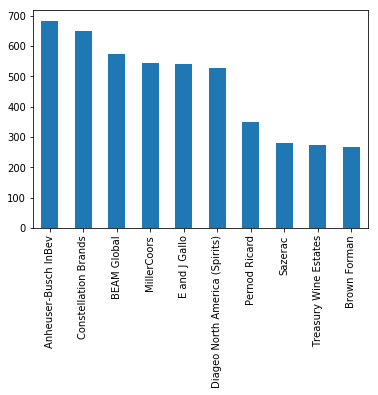

In [12]:
selected_catalog_data_frame['MANUFACTURER_NAME'].value_counts().head(10).plot(kind='bar')

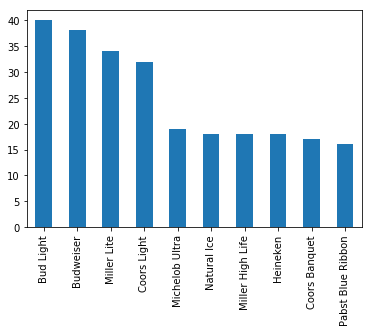

In [13]:
selected_catalog_data_frame['PRODUCT_NAME'].value_counts().head(10).plot(kind='bar')

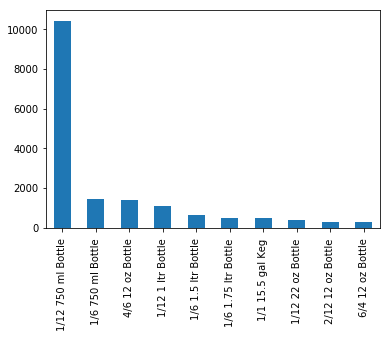

In [14]:
selected_catalog_data_frame['PACKAGE_DETAIL'].value_counts().head(10).plot(kind='bar')

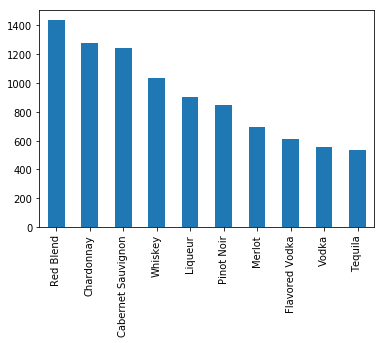

In [15]:
selected_catalog_data_frame['PRODUCT_TYPE'].value_counts().head(10).plot(kind='bar')

In [16]:
#transform data
prepared_data_frame = selected_catalog_data_frame.copy(deep=True)

prepared_data_frame = prepared_data_frame.\
    apply(lambda column: column.apply(lambda value: value.lower().replace(' ', '')) \
          if column.dtype == 'object' else column)
    
prepared_data_frame.head()

,MASTER_CATALOG_ID,MANUFACTURER_NAME,BRAND_NAME,PRODUCT_NAME,PACKS_PER_CASE,UNITS_PER_PACK,UNIT_SIZE,PRODUCT_COLOR,PRODUCT_TYPE,STD_NAME,PACKAGE_DETAIL
0,2723,constellationbrands,blufeld,blufeldmoselriesling,1,12,0.7500,white,riesling,blufeldmoselriesling1/12750mlbottle,1/12750mlbottle
1,2724,heavenhilldistilleries,christianbrothers,c.b.rubyport,1,6,1.5000,red,portblend,rubyport1/61.5ltrbottle,1/61.5ltrbottle
2,2725,constellationbrands,closdubois,closduboismerlotsonomacity,1,12,0.0875,red,merlot,closduboismerlotsonomacity1/1288mlbottle,1/1288mlbottle
3,2726,constellationbrands,closdubois,closduboiscabernetsauvignon,1,12,0.7500,red,cabernetsauvignon,closduboiscabernetsauvignon1/12750mlbottle,1/12750mlbottle
4,2727,constellationbrands,closdubois,closduboischardonnay,1,12,0.7500,white,chardonnay,closduboischardonnay1/12750mlbottle,1/12750mlbottle


In [106]:
train_data_frame = prepared_data_frame.copy(deep=True).sample(n=1000)

In [107]:
#model

# The model uses Levenshtein distance to determine similarity for each brand name, product type 
# in test string, then it will select row with highest sum of distance ratio.


def get_component_distance_ratio(component_value, test_string):
    return difflib.SequenceMatcher(None, component_value, test_string).ratio()

def calculate_distance_ratio(components, test_string, train_data_frame):
    return train_data_frame[components].applymap(lambda component_value: \
       get_component_distance_ratio(component_value, test_string))
    
def get_highest_distance_ratio_row(components, test_string, train_data_frame):
    component_distance_ratio_data_frame = \
        calculate_distance_ratio(components, test_string, train_data_frame)
        
    component_distance_ratio_data_frame['SUM_OF_DISTANCE_RATIOS'] = component_distance_ratio_data_frame.\
        apply(lambda row: row[components].sum(), axis=1)
    
    max_value = component_distance_ratio_data_frame['SUM_OF_DISTANCE_RATIOS'].max()
    return train_data_frame.loc[(component_distance_ratio_data_frame['SUM_OF_DISTANCE_RATIOS'] == \
        max_value)].head(1)['MASTER_CATALOG_ID'].values[0]

def get_prediction(components, test_sample_data_frame, train_data_frame, test_column):
    return test_sample_data_frame[test_column].apply(lambda test_string: \
        get_highest_distance_ratio_row(components, test_string, train_data_frame))

In [110]:
#unit testing
test_sample_data_frame = train_data_frame.sample(n=3)

# get_component_distance_ratio('closdubois', 'closduboismerlotsonomacity1/1288mlbottle')

# calculate_distance_ratio(['BRAND_NAME'], 'closduboismerlotsonomacity1/1288mlbottle',\
#       train_data_frame)

# get_highest_distance_ratio_row(['BRAND_NAME'], 'closduboismerlotsonomacity1/1288mlbottle',\
#     train_data_frame)

test_sample_data_frame['PREDICTION'] = get_prediction(['BRAND_NAME', 'PRODUCT_NAME', 'PACKAGE_DETAIL'],\
    test_sample_data_frame, train_data_frame, 'STD_NAME')

In [111]:
test_sample_data_frame[['MASTER_CATALOG_ID', 'PREDICTION', 'STD_NAME']]

,MASTER_CATALOG_ID,PREDICTION,STD_NAME
19393,28807,28807,twobeersevolutionaryindiapaleale1/1222ozbottle
6848,17692,17692,wenterelizcreekpinotnoir1/12750mlbottle
1114,1963,1963,canadadrylemonlime2/1212ozcan


In [112]:
#run prediction

components = ['BRAND_NAME', 'PRODUCT_NAME', 'PACKAGE_DETAIL']

accuracies = []
for i in range(10):
    test_data_frame = train_data_frame.sample(n=10)
    test_data_frame['PREDICTION'] = get_prediction(components,\
        test_data_frame, train_data_frame, 'STD_NAME')
    accuracy = metrics.accuracy_score(test_data_frame['MASTER_CATALOG_ID'],\
        test_data_frame['PREDICTION'])
    print('accuracy ' + str(accuracy))
    accuracies.append(accuracy)
    
print('mean accuracy ' + str(numpy.mean(accuracies)))

accuracy 1.0
accuracy 1.0
accuracy 1.0
accuracy 1.0
accuracy 1.0
accuracy 1.0
accuracy 1.0
accuracy 1.0
accuracy 0.9
accuracy 1.0
mean accuracy 0.99
